#  Mayank Kumar 

# *Project-Title = Loan approval prediction using Machine learning techniques*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

### Loading data 

In [2]:
train = pd.read_csv("loan prediction.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Performing EDA

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


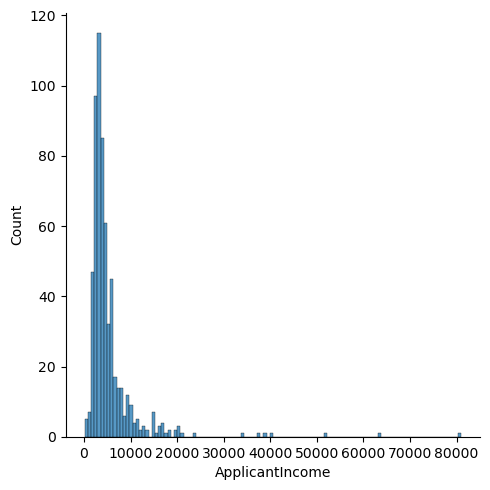

In [6]:
sns.displot(train.ApplicantIncome,kde = False)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


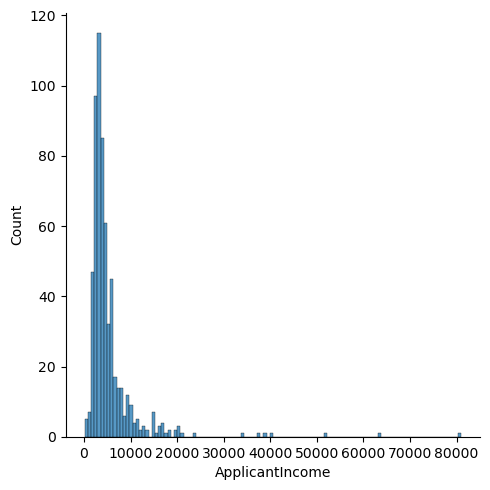

In [7]:
sns.displot(train.ApplicantIncome.dropna())

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

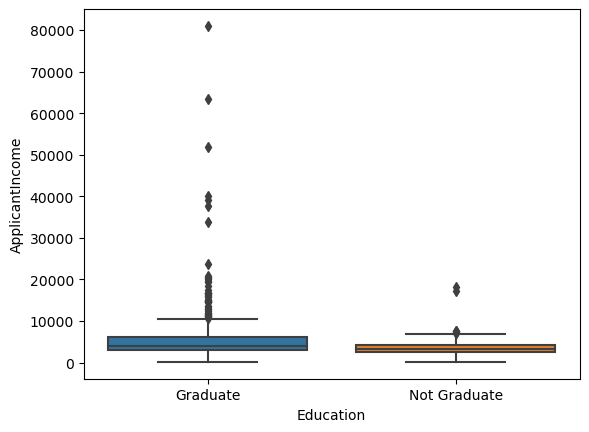

In [8]:
sns.boxplot(x='Education',y="ApplicantIncome",data = train)

*Here Graduates have more outliers it means that people with huge incomes are most likely to be educated*

## Data Preprocessing

In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filling the null values

In [10]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)

In [11]:
train["Married"].fillna(train["Married"].mode()[0],inplace=True)

In [12]:
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)

In [13]:
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].mode()[0],inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mean(),inplace=True)

In [14]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Done :)

## Now Time to deal with the Outliers

In [15]:
train['LoanAmountLog'] = np.log(train["LoanAmount"]) 

In [16]:
train["TotalIncome"] = train['ApplicantIncome'] + train["CoapplicantIncome"] #cauz jo mera wo tera,jo tera wo mera

In [17]:
train['TotalIncomeLog'] = np.log(train['TotalIncome']) 

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


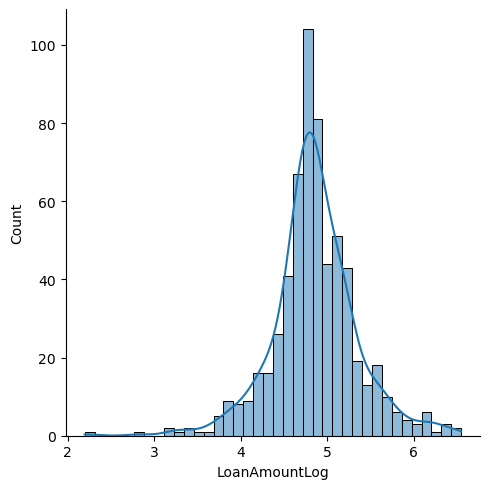

In [18]:
sns.displot(train.LoanAmountLog, kde = True)

*Now looks like a normal Distribution*

## Model Training using SkLearn

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
category = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
encoder = LabelEncoder()

In [21]:
for i in category:
    train[i] = encoder.fit_transform(train[i])
train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmountLog        float64
TotalIncome          float64
TotalIncomeLog       float64
dtype: object

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics

In [23]:
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : {0:.3%}".format(accuracy))
    kf = KFold(n_splits = 5)
    error = []
    for train, test in kf.split(data[predictors]):

        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors,train_target)
        error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
        print("Cross-Validation Score : {:.3%}".format(np.mean(error)))
        

## Using Logistic Regression

In [24]:
outcome = "Loan_Status"
model = LogisticRegression()
predictors_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,train,predictors_var,outcome)

Accuracy : 80.945%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.691%
Cross-Validation Score : 80.946%


## Using Decision Tree

In [25]:
model = DecisionTreeClassifier()
predictors_var = ['Credit_History','Gender','Married','Education']
classification_model(model,train,predictors_var,outcome)

Accuracy : 81.270%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.691%
Cross-Validation Score : 81.110%


## Using Random Forest 

In [26]:
model = RandomForestClassifier(n_estimators = 100)
predictors_var = ['Gender','Married','Dependents','Education','Self_Employed','LoanAmountLog','Loan_Amount_Term','Credit_History','Property_Area','TotalIncomeLog']
classification_model(model,train,predictors_var,outcome)

Accuracy : 100.000%
Cross-Validation Score : 75.610%
Cross-Validation Score : 75.203%
Cross-Validation Score : 76.423%
Cross-Validation Score : 77.439%
Cross-Validation Score : 78.017%


*This algorithm gives us a accuracy of 100% with low cross validation score which shows that our model is overfitting*